In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train.csv')

In [4]:
display(df)

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix
...,...,...
5503,5f0c970adf,lampropeltis-triangulum
5504,f6a4287fac,pantherophis-alleghaniensis
5505,d3c10e63e1,thamnophis-sirtalis
5506,61ef50879c,pituophis-catenifer


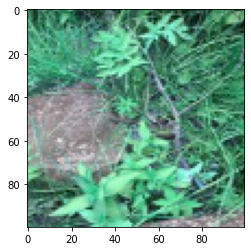

In [50]:
data = []
img_size = 100
dir = r'/kaggle/input/hackerearth-deep-learning-identify-the-snake-breed/dataset/train'

for i in range(len(df)):
    label = df['breed'].values[i]
    id = df['image_id'].values[i]
    img_path = os.path.join(dir,id)
    img_path += '.jpg'
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(img_size,img_size))
    plt.imshow(img_arr)
    data.append([img_arr, label])
    

In [36]:
random.shuffle(data)

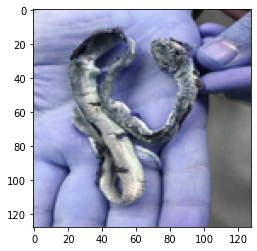

In [47]:
plt.imshow(data[8][0])

In [37]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)
    
    
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)    

(5508, 128, 128, 3)
(5508,)


In [38]:
d={}
count=0
for i in y:
    if i not in d.keys():
        d[i]=count
        count+=1
y_final=[]
for i in y:
    y_final.append(d[i])
y_final=np.array(y_final)
y=y_final
print(y)
print(count)

[ 0  1  2 ...  3 10  5]
35


In [39]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.1, random_state = None)

In [40]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(4957, 128, 128, 3)
(4957,)
(551, 128, 128, 3)
(551,)


Deeplearning Begins

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D
from keras.models import Sequential
from keras.models import Model
from keras import backend as K

In [12]:
from keras.applications.resnet50 import ResNet50

In [13]:
model = ResNet50(weights = 'imagenet',include_top=False, input_shape = (img_size,img_size,3))

94773248/94765736 [==============================] - 1s 0us/step


In [14]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [15]:
output = model.layers[-1].output
output = Flatten()(output)

In [16]:
model = Model(inputs = model.input, outputs = output)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [17]:
output = model.layers[-1].output
output = Dense(35, activation = 'softmax')(output)


In [18]:
model = Model(inputs = model.input, outputs = output)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [19]:
for layer in model.layers:
    layer.trainable = True

Compile

In [42]:
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model.fit(xTrain,yTrain.T,epochs = 30, validation_split = 0.2)

Epoch 1/30
124/124 [==============================] - 10s 84ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 6.8506 - val_accuracy: 0.0877
Epoch 2/30
124/124 [==============================] - 10s 77ms/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 6.8480 - val_accuracy: 0.0857
Epoch 3/30
124/124 [==============================] - 10s 77ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 6.8585 - val_accuracy: 0.0867
Epoch 4/30
124/124 [==============================] - 10s 77ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 6.8660 - val_accuracy: 0.0837
Epoch 5/30
 53/124 [===========>..................] - ETA: 5s - loss: 0.0039 - accuracy: 0.9994

KeyboardInterrupt: 

In [35]:
model.evaluate(x=xTest, y=yTest)

35/35 [==============================] - 1s 23ms/step - loss: 10.1215 - accuracy: 0.0944


[10.121487617492676, 0.09437386691570282]

In [23]:
p = model.predict(xTest)
print(p)

[[3.1380661e-02 1.8990489e-02 2.0929049e-03 ... 2.3678227e-04
  4.8392636e-04 1.7957847e-03]
 [1.0642097e-01 8.9363500e-02 2.2191802e-02 ... 2.8690771e-04
  2.4358275e-04 2.8613035e-04]
 [1.0640330e-03 3.5370152e-02 8.7281712e-04 ... 2.3177064e-03
  4.5241245e-07 4.1683001e-05]
 ...
 [1.2704914e-03 3.7805345e-02 1.8169943e-05 ... 1.2411926e-01
  2.1498540e-06 1.3025635e-05]
 [2.4498630e-02 4.7022447e-01 8.0349315e-03 ... 2.7744280e-02
  4.1708848e-04 1.8640494e-04]
 [1.5954234e-01 5.8272964e-01 6.6281250e-03 ... 3.0486491e-02
  4.3434591e-04 1.0115448e-04]]


In [24]:
yTest


array([ 3, 25, 15, ...,  9,  1, 32])

In [31]:
p = np.array(p)

In [32]:
np.argmax(p,axis = 1)

array([16, 16, 10, ...,  6,  1,  1])